# CASE STUDY - WORLD BANK
In questo file vengono utilizzate classi e metodi del package opandas_wb.api per analizzare e costruire grafici dai dati presi da World Bank. Gli oggetti utilizzati per rappresentare i dati sono: Topic, Indicator ed Observable. E’ presente un database di cache dove vengono salvati i dati richiesti per la prima volta da world bank, così da evitare ulteriori chiamate alle API World Bank per le richieste successive. Il database è costituito da quattro tabelle:
- Topics: id del topic, nome del topic, breve descrizione del topic
- Indicators: sigla dell’indicatore, nome esteso dell’indicatore, breve descrizione dell’indicatore
- Observables: sigla dell’indicatore di riferimento, paese di riferimento, anno dell’osservabile, valore dell’osservabile
- Tabella pivot per poter identificare tutti i topic relativi a un Indicator
Nel file fetch sono contenuti tutti i metodi che permettono di effettuare la ricerca nel db ed in caso non vada a buon fine scarica e salva tutti i dati così ottenuti.
Tutte le funzioni che permettono di graficare osservabili eseguono un controllo sui valori nulli, i quali per semplicità vengono esclusi dalle serie di osservabili. Inoltre tutte queste funzioni sono state testate precedentemente nei test presenti nella cartella /tests/ del progetto.

## Grafico con tre serie di osservabili

Il metodo 'multi_indicator_plot' permette di graficare in un unico grafico più serie di osservabili, prende come parametri di input una lista di tuple con nome indicatore e paese. Una volta ottenuti tutti i dati relativi all'osservabile (serie di valori e date) vengono creati due array numpy passati come parametri al metodo 'plot' di matplotlib.

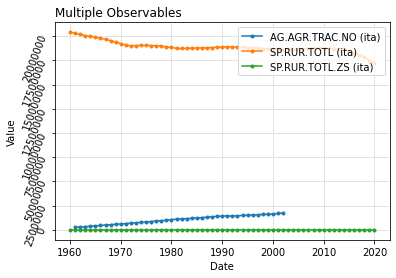

In [1]:
from src.opandas_wb.api.plots import *

ind_1 = 'AG.AGR.TRAC.NO'
ind_2 = 'SP.RUR.TOTL'
ind_3 = 'SP.RUR.TOTL.ZS'
country = 'ita'
indicators = [(ind_1, country), (ind_2, country), (ind_3, country)]
multi_indicator_plot(indicators).show()

# Grafico Media mobile

Il metodo 'media_mobile' permette di graficare la media mobile di un osservabile, come prametri di input richiede il nome dell'indicatore relativo all'osservabile, il paese dell'osservabile e il valore della finestra.

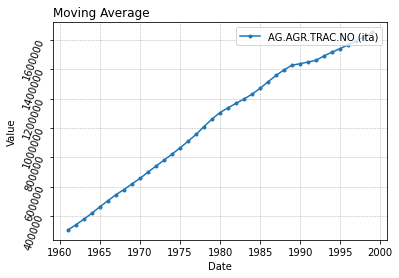

In [2]:
media_mobile(ind_1, 'ita', 3).show()

# Grafici delle covarianze

Il metodo 'covarianza' prende in input due tuple contenenti il nome dell'indicatore e del paese relativi all'osservabile. E' consigliabile scegliere due osservabili dello stesso paese, ma indicatori diversi. I due set di valori vengono convertiti in pandas series e con il metodo 'cov' di pandas vengono calcolati i valori della covarianza tra le due serie di osservabili.
Le due serie vengono poi rappresentate su un grafico scatter attraverso il metodo 'cmp_scatter_plot'

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL)=-193974735025.69745


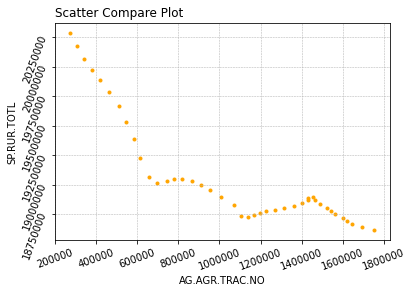

cov(AG.AGR.TRAC.NO,SP.RUR.TOTL.ZS)=-932980.7657119631


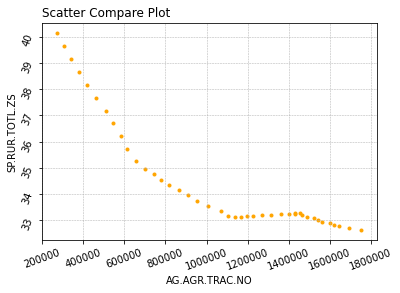

cov(SP.RUR.TOTL,SP.RUR.TOTL.ZS)=1423723.0456726772


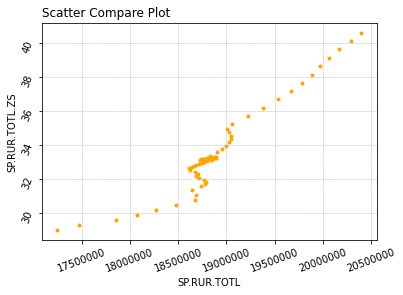

In [3]:
x_values = (ind_1, country)
y_values = (ind_2, country)
print("cov({},{})={}".format(ind_1, ind_2, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_1, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_1, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

x_values = (ind_2, country)
y_values = (ind_3, country)
print("cov({},{})={}".format(ind_2, ind_3, covarianza(x_values, y_values)))
cmp_scatter_plot(x_values, y_values).show()

# Grafici delle differenze prime

I metodi 'diff_prime' e 'diff_prime_perc' permettono di graficare le differenze prime e le differenze prime percentuali delle tre serie di osservabili scelte. Anche in questo caso i dati delle singole serie vengono convertiti in pandas series per poter poi utilizzare rispettivamente i metodi pandas 'diff' e 'pct_change' e calcolare quindi i valori finali.

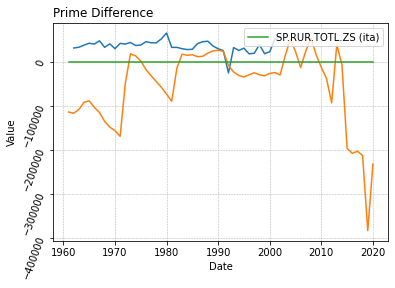

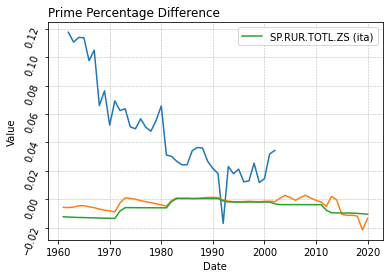

In [4]:
diff_prime(ind_1, country)
diff_prime(ind_2, country)
diff_prime(ind_3, country).show()
diff_prime_perc(ind_1, country)
diff_prime_perc(ind_2, country)
diff_prime_perc(ind_3, country).show()

# Rette di regressione

Il metodo 'retta_reg' permette di calcolare e graficare la retta di regressione di un osservabile. Prende come parametro di input il nome dell'indicatore ed il paese relativo all'osservabile. In questo caso le serie di valori vengono convertite in numpy array per poter utilizzare il metodo 'mean' per calcolare i coefficienti della retta.

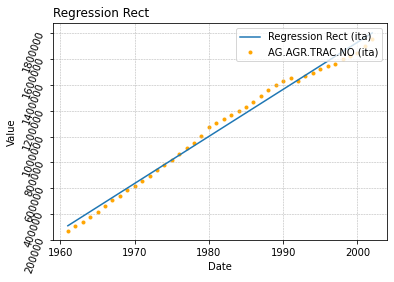

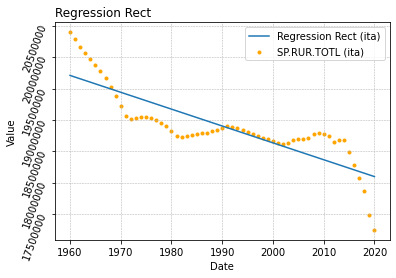

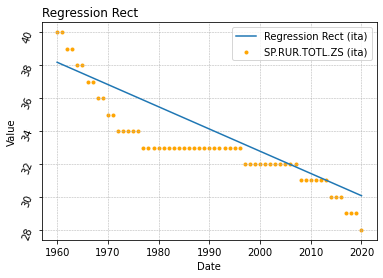

In [5]:
retta_reg(ind_1, country).show()
retta_reg(ind_2, country).show()
retta_reg(ind_3, country).show()